## SHapley Additive exPlanations (SHAP)

### Library Imports 

In [2]:
import os
import pickle

import pandas as pd
import shap

In [3]:
RAND_STATE = 0

### Import the Train and Test Sets

In [4]:
dataset_folder = f"{os.path.abspath(os.path.join(os.getcwd(), os.pardir))}/datasets"

In [5]:
X_train = pd.read_csv(os.path.join(dataset_folder, "obesity_X_train.csv"), index_col=0)

In [6]:
X_test = pd.read_csv(os.path.join(dataset_folder, "obesity_X_test.csv"), index_col=0)

### Import Random Forest Model

In [7]:
def import_model(filename):
    file_path = f"{os.path.abspath(os.path.join(os.getcwd(), os.pardir))}/models/{filename}"
    with open(file_path, 'rb') as file: 
        model = pickle.load(file)
    print(f"Model imported from {file_path}")
    return model

In [8]:
rand_forest = import_model("rand_forest.pkl")

Model imported from /home/cyrof/university/202-assignment-1/models/rand_forest.pkl


In [9]:
rand_forest_no_weight = import_model("rand_forest_no_weight.pkl")

Model imported from /home/cyrof/university/202-assignment-1/models/rand_forest_no_weight.pkl


### Preprocessing

In [10]:
nominal_features = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS"
]

### Create SHAP explainer 

In [11]:
explainer = shap.TreeExplainer(rand_forest)
shap_values = explainer.shap_values(X_test)

### Summary Plot

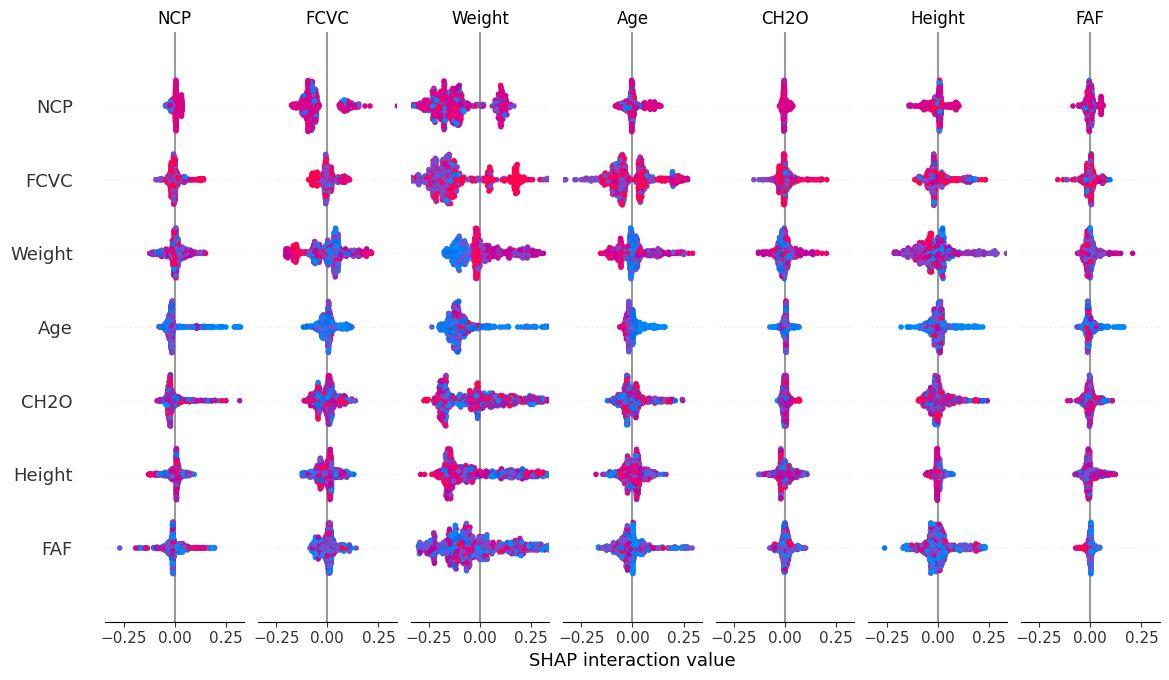

In [12]:
shap.summary_plot(shap_values, X_test)

In [13]:
shap.summary_plot(shap_values[0], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [16]:
shap_values[0]

array([[-2.31883599e-02, -3.03570132e-03, -3.53501255e-02,
         2.59623215e-02,  1.27662229e-02, -5.04560260e-02,
         7.33016684e-02],
       [ 3.21774900e-04, -1.17551096e-02, -5.33369702e-02,
        -1.49422716e-02,  5.90200834e-03, -2.79479010e-02,
         1.01758469e-01],
       [-4.95392556e-02, -1.59340888e-02,  2.20179224e-02,
        -1.13130564e-01, -1.12996080e-01,  4.81398210e-02,
         2.21442245e-01],
       [ 7.06309141e-03, -2.34111686e-02,  7.91551255e-03,
         2.33029795e-02, -5.83330601e-02,  1.11822875e-02,
         3.22803576e-02],
       [-9.06392066e-03,  9.95666928e-03, -4.57848816e-03,
        -2.29111277e-03,  7.67897248e-03, -1.35091555e-02,
         1.18070353e-02],
       [ 2.24304582e-03, -1.07618923e-02, -6.33454205e-03,
        -5.22444016e-03,  7.09673589e-04,  1.21369204e-02,
         7.23123465e-03],
       [-4.50397880e-03, -9.34838280e-03, -6.45255271e-03,
         1.80731219e-03, -1.51106812e-03, -4.87328266e-03,
         2.4881952

In [15]:
X_test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1010,0.116214,-0.003824,-0.215047,0.234743,0.411816,0.421137,-0.593813,0.578099,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
373,-0.531642,-1.738187,-1.165774,-0.798168,-2.134460,-0.020113,-1.185621,2.223812,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
413,1.322506,0.538164,-0.051776,-0.798168,0.411816,-0.020113,-0.009349,-1.067615,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
429,0.240920,2.164129,-0.243844,-0.798168,0.411816,-1.657016,-0.009349,-1.067615,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1517,0.482334,2.257438,1.631825,-0.407417,0.411816,-0.326080,1.107920,-1.067615,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1.520542,-0.292888,-0.351184,0.508772,-1.070699,-0.480788,-0.392405,0.096309,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
749,-0.531642,-0.898441,-0.671397,-2.301728,0.411816,0.645355,-0.068351,-0.278955,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
864,-0.184699,0.082547,-0.421173,0.266624,0.545504,-1.374770,-0.968108,0.451513,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28,-0.840667,0.538164,-0.397499,1.096143,0.411816,-0.020113,2.343193,0.578099,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
